Plan: \
create projection of the pixels onto x axis and y axis \
compare the two histograms

In [ ]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import Config
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
#import skimage as sk

In [ ]:
featuresdf = pd.read_csv(Config.features_path)

In [ ]:
truthdf = pd.read_csv(Config.example_ground_truth_path)

In [ ]:
colors = ['green' if i == 0 else 'red' for i in truthdf['melanoma']]

In [ ]:
def compactness(p, A):
    """ Computes and returns the compactness of a figure """
    return   round(4*np.pi*A / p ** 2, 4)

In [ ]:
compactlst = list()
for p, A in zip(featuresdf['perimeter'], featuresdf['area']):
    compactlst.append(compactness(p, A))

In [ ]:
featuresdf['compactness'] = compactlst

In [ ]:
featuresdf.head()

,id,area,perimeter,compactness
0,ISIC_0001769,216160.0,2013.0,0.6703
1,ISIC_0001852,130493.0,1372.0,0.8711
2,ISIC_0001871,205116.0,1720.0,0.8713
3,ISIC_0003462,161705.0,1344.0,1.1250
4,ISIC_0003539,317040.0,2063.0,0.9361


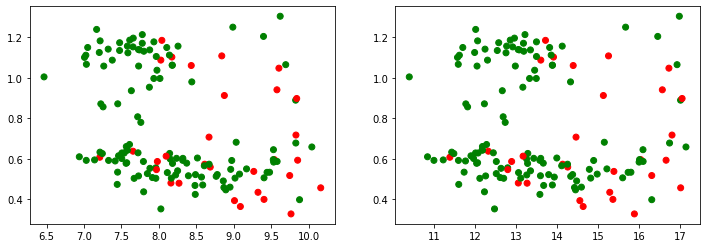

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

featurelst = ['perimeter', 'area']
for i, ax in enumerate(axs):
    feature = featurelst[i]
    ax.scatter(np.log(featuresdf[feature]+1), featuresdf['compactness'], c=colors)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>